In [1]:
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt

from torch_geometric.data import Data
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import PandasTools

In [2]:
ls sdf

mol_100071.sdf  mol_155576.sdf  mol_217387.sdf  mol_268202.sdf  mol_44900.sdf
mol_101372.sdf  mol_157394.sdf  mol_21800.sdf   mol_268542.sdf  mol_45225.sdf
mol_101795.sdf  mol_157970.sdf  mol_218301.sdf  mol_268672.sdf  mol_45405.sdf
mol_101915.sdf  mol_158733.sdf  mol_218565.sdf  mol_268774.sdf  mol_45900.sdf
mol_102321.sdf  mol_159039.sdf  mol_219115.sdf  mol_268868.sdf  mol_45939.sdf
mol_103251.sdf  mol_159049.sdf  mol_2195.sdf    mol_268887.sdf  mol_4650.sdf
mol_10330.sdf   mol_159285.sdf  mol_220088.sdf  mol_269727.sdf  mol_47262.sdf
mol_103430.sdf  mol_16001.sdf   mol_220291.sdf  mol_270147.sdf  mol_47417.sdf
mol_103699.sdf  mol_160391.sdf  mol_220567.sdf  mol_270152.sdf  mol_47972.sdf
mol_104416.sdf  mol_160744.sdf  mol_220874.sdf  mol_270449.sdf  mol_48008.sdf
mol_105092.sdf  mol_16112.sdf   mol_221492.sdf  mol_270663.sdf  mol_48464.sdf
mol_105528.sdf  mol_16121.sdf   mol_222057.sdf  mol_271040.sdf  mol_49189.sdf
mol_105966.sdf  mol_161843.sdf  mol_222568.sdf  mol_271373.sdf  m

In [3]:
suppl = Chem.SDMolSupplier('sdf/mol_100071.sdf')

In [7]:
for i in suppl:
    i

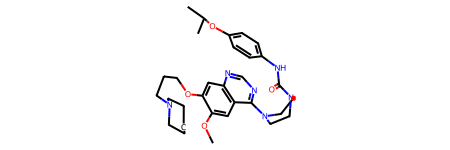

In [6]:
i.

In [3]:
def get_drug_graph(mol):
    suppl = Chem.SDMolSupplier('sdf/' + i)
    mol = suppl[0]
    position = (mol.GetConformer().GetPositions())

    nodes = pd.DataFrame([[
        a.GetAtomicNum(), a.GetDegree(), a.GetHybridization(), a.GetIsAromatic(), a.GetFormalCharge()
    ] for a in mol.GetAtoms()])

    atom_type = np.array([a.GetAtomicNum() for a in mol.GetAtoms()])
    
    bonds = [(
        bond.GetBeginAtomIdx(), bond.GetEndAtomIdx(), bond.GetBondType(), bond.GetStereo(), 
    ) for bond in mol.GetBonds()]
    bonds = pd.DataFrame(bonds).values

    edges = bonds[:, :2]
    edges_attr = bonds[:, 2:]

    node_features = torch.Tensor(nodes.values.astype(int))
    atom_type = torch.Tensor(atom_type.astype(int))
    edge_index = torch.tensor(edges, dtype=torch.long).t().contiguous()
    edges_attr = torch.tensor(edges_attr, dtype=torch.long)
    position = torch.tensor(position, dtype=torch.long)
    data = Data(x=node_features, edge_index=edge_index, edge_attr=edges_attr, pos=position, atom_type=atom_type)
    return data

In [ ]:
# Undirected

In [4]:
drugs = !ls sdf/

In [5]:
drug_graphs = {}
errors = []
for i in drugs:
    try:
        drug_graphs[i.split('.')[0]] = get_drug_graph('sdf/'+i)
    except:
        errors.append(i)

[13:49:46] Warning: molecule is tagged as 3D, but all Z coords are zero
[13:49:46] Warning: molecule is tagged as 3D, but all Z coords are zero
[13:49:47] Warning: molecule is tagged as 3D, but all Z coords are zero
[13:49:47] Warning: molecule is tagged as 3D, but all Z coords are zero
[13:49:47] Warning: molecule is tagged as 3D, but all Z coords are zero
[13:49:48] Warning: molecule is tagged as 3D, but all Z coords are zero
[13:49:48] Warning: molecule is tagged as 3D, but all Z coords are zero
[13:49:48] Warning: molecule is tagged as 3D, but all Z coords are zero
[13:49:48] Warning: molecule is tagged as 3D, but all Z coords are zero


In [6]:
drug_graphs

{'mol_100071': Data(x=[41, 5], edge_index=[2, 45], edge_attr=[45, 2], pos=[41, 3], atom_type=[41]),
 'mol_101372': Data(x=[33, 5], edge_index=[2, 37], edge_attr=[37, 2], pos=[33, 3], atom_type=[33]),
 'mol_101795': Data(x=[17, 5], edge_index=[2, 20], edge_attr=[20, 2], pos=[17, 3], atom_type=[17]),
 'mol_101915': Data(x=[22, 5], edge_index=[2, 24], edge_attr=[24, 2], pos=[22, 3], atom_type=[22]),
 'mol_102321': Data(x=[34, 5], edge_index=[2, 37], edge_attr=[37, 2], pos=[34, 3], atom_type=[34]),
 'mol_103251': Data(x=[38, 5], edge_index=[2, 42], edge_attr=[42, 2], pos=[38, 3], atom_type=[38]),
 'mol_10330': Data(x=[25, 5], edge_index=[2, 28], edge_attr=[28, 2], pos=[25, 3], atom_type=[25]),
 'mol_103430': Data(x=[16, 5], edge_index=[2, 17], edge_attr=[17, 2], pos=[16, 3], atom_type=[16]),
 'mol_103699': Data(x=[21, 5], edge_index=[2, 24], edge_attr=[24, 2], pos=[21, 3], atom_type=[21]),
 'mol_104416': Data(x=[21, 5], edge_index=[2, 23], edge_attr=[23, 2], pos=[21, 3], atom_type=[21]),
 

In [7]:
len(errors)

0

In [8]:
errors

[]

In [9]:
import json
import gzip
import zlib
import pickle

In [10]:
with gzip.open('drug.pkl.gz', 'wb') as f:
    pickle.dump(drug_graphs, f)